<a href="https://colab.research.google.com/github/chonzadaniel/pytorch-deep-learning/blob/main/033_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

2.2.1+cu121


device(type='cpu')

## 1. What are 3 areas in industry where computer vision is currently being used?

1. HealthCare
2. Automotive
3. Hospitality


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

`Overfitting` is a problem where the evaluation of machine learning algorithms on training data is different from unseen data. The machine learning model tries to cover all the data points or more than the required data points present in the given dataset.

It's is a common challenge in machine learning where a model learns the training data too well, including its noise and outliers, making it perform poorly on unseen data. Addressing overfitting is crucial because a model's primary goal is to make accurate predictions on new, unseen data, not just to replicate the training data.

**The causes of overfitting can be numerous:**

* `Complex models`. Using an overly complex model for a simple task can lead to overfitting. For instance, using a high-degree polynomial regression for data that's linear in nature.
* `Insufficient data`. If there's not enough data, the model might find patterns that don't really exist.
* `Noisy data`. If the training data contains errors or random fluctuations, an overfitted model will treat these as patterns.

-- https://www.datacamp.com/blog/what-is-overfitting


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Preventing overfitting is better than curing it. Here are some steps to take:

* `Simpler models`. Start with a simpler model and only add complexity if necessary.
* `More data`. If possible, collect more data. The more data a model is trained on, the better it can generalize.
* `Regularization`. Techniques like L1 and L2 regularization can help prevent overfitting by penalizing certain model parameters if they're likely causing overfitting.
* `Dropout`. In neural networks, dropout is a technique where random neurons are "dropped out" during training, forcing the network to learn more robust features.

-- https://www.datacamp.com/blog/what-is-overfitting

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

# Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [7]:
# Setup training data
from torchvision import datasets

# Create how train set will be loaded
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None
)

# Create how test data set will be loaded
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
# Visualizing image labels
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
# Visualizing image labels and respective index (targets)
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
# Visualizing image targets
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
# Accessing an image and its corresponding label from the training dataset
image, label = train_data[0]  # Access the first image and label

# Check the image shape and print label
print(f"Image shape: {image.shape} -> [color_channels, height, width]")  # Channel is removed after squeezing
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


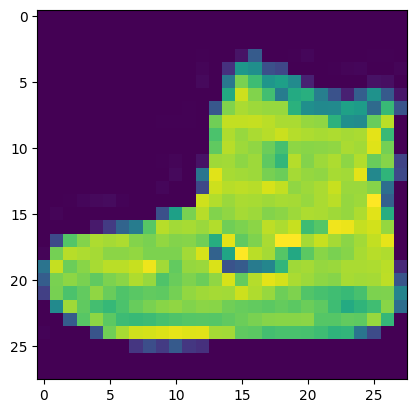

In [13]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
# image

In [14]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
# plt.imshow(image.squeeze())
image

Image shape: torch.Size([1, 28, 28])


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [15]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
# plt.imshow(image)
# image

Image shape: torch.Size([1, 28, 28])


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

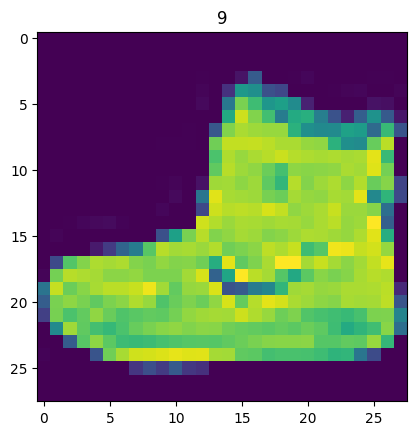

In [16]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
# image

Text(0.5, 1.0, 'Ankle boot')

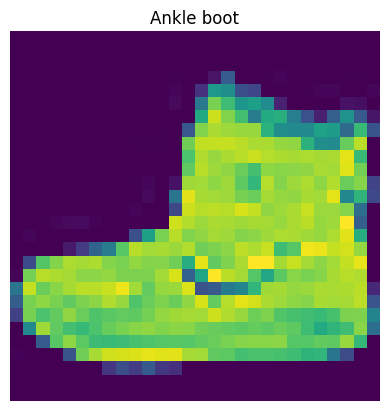

In [17]:
import matplotlib.pyplot as plt

image, label = train_data[0]
# print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.axis(False)
plt.title(class_names[label])
# image

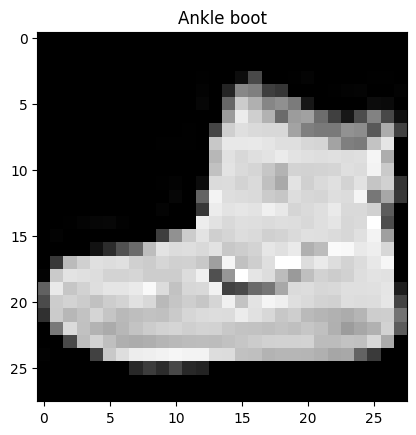

In [18]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

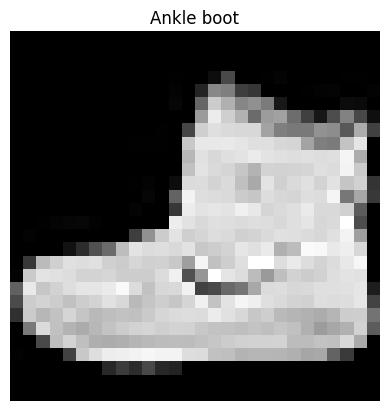

In [19]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

In [20]:
# Plot more images
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    random_idx

<Figure size 900x900 with 0 Axes>

In [21]:
# Plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

## 6. Visualize at least 5 different samples of the MNIST training dataset.

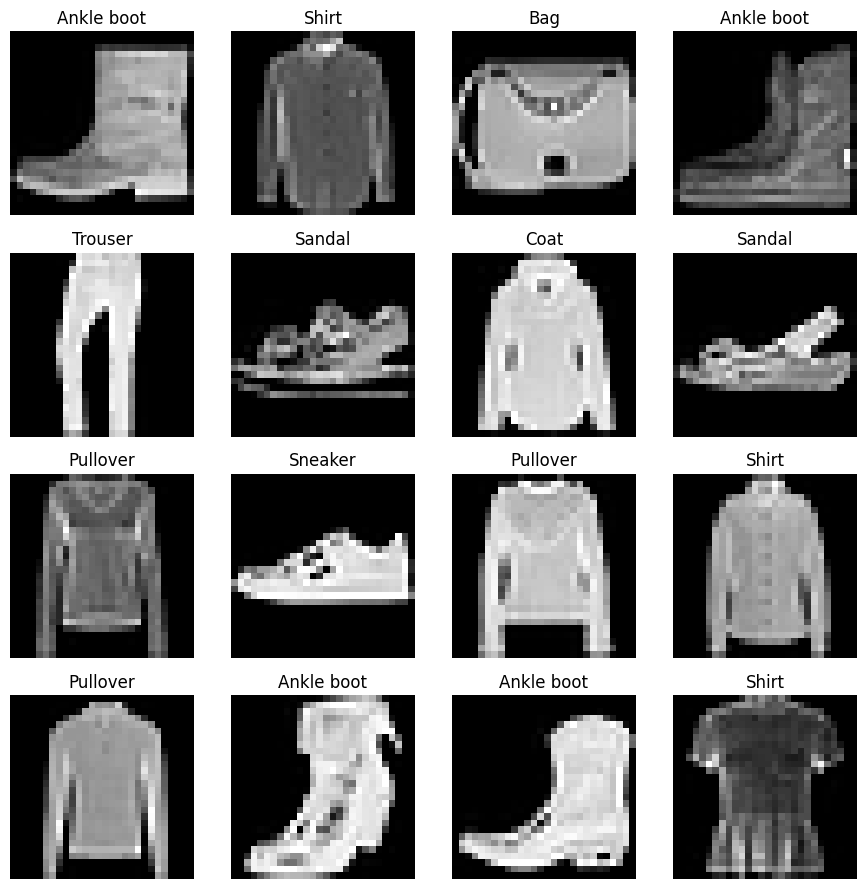

In [22]:
# Setup a figure to plot the images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))  # Create a figure of size 9x9 inches
rows, cols = 4, 4  # Define the grid size

# Plot images in a grid
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(len(train_data), size=(1,)).item()  # Get a random index
    img, label = train_data[random_idx]  # Use indexing to access the dataset
    img = img.squeeze()  # Squeeze the image to remove channel dimension
    ax = fig.add_subplot(rows, cols, i)  # Add a subplot
    ax.imshow(img, cmap='gray')  # Show the image in grayscale
    ax.set_title(class_names[label])  # Set the title of the subplot to the label of the image
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()  # Display the figure with the images

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [23]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d75cc09b790>,
 <torch.utils.data.dataloader.DataLoader at 0x7d75cbe02dd0>)

In [24]:
# Chek out what is created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f"Lenth of testd_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}....")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d75cc09b790>, <torch.utils.data.dataloader.DataLoader object at 0x7d75cbe02dd0>)
Length of train_dataloader: 1875 batches of 32....
Lenth of testd_dataloader: 313 batches of 32....


In [25]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


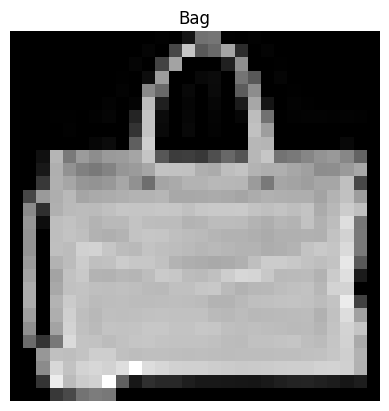

In [26]:
#Show a sample
# torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [27]:
# Create a Convolutional neural newtwork

class FashionMNISTModel(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a Conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values which can be set by ML Engineers/Data Scientists in the NN's are called hyperparameters

            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [28]:
RANDOM_SEED = (42)

torch.manual_seed(RANDOM_SEED)
model_cnn = FashionMNISTModel(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_names)).to(device)

model_cnn

FashionMNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [29]:
list(model_cnn.state_dict())

['conv_block_1.0.weight',
 'conv_block_1.0.bias',
 'conv_block_1.2.weight',
 'conv_block_1.2.bias',
 'conv_block_2.0.weight',
 'conv_block_2.0.bias',
 'conv_block_2.2.weight',
 'conv_block_2.2.bias',
 'classifier.1.weight',
 'classifier.1.bias']

In [30]:
from timeit import default_timer as timer
import torch
from torch import nn

def print_train_time(
        start: float,
        end: float,
        device: torch.device = None):
    """Prints difference between start and end time."""

    total_time = end - start
    print(f"Train time on { device}: {total_time:.3f} seconds")
    return total_time

start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.692499922181014e-05

In [31]:
import requests
from pathlib import Path

# File and URL setup
helper_file_path = Path("helper_functions.py")
url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

# Delete the incorrect file if it exists
if helper_file_path.is_file():
    with open(helper_file_path, 'r') as file:
        first_line = file.readline()
        if first_line.startswith('<!doctype html>'):  # Check if the file content is HTML
            print("HTML content detected, deleting the file...")
            helper_file_path.unlink()  # Delete the file
            print("Deleted HTML file.")
        else:
            print("Python file already exists and looks correct, skipping download....")
            exit()

# Download the correct file
print(f"Downloading {helper_file_path} from GitHub...")
response = requests.get(url)
if response.status_code == 200:
    with open(helper_file_path, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {helper_file_path} successfully!")
else:
    print(f"Failed to download {helper_file_path}. Status code: {response.status_code}")

# Try importing the accuracy function
try:
    from helper_functions import accuracy_fn
    print("Imported accuracy_fn successfully.")
except ImportError as e:
    print(f"Failed to import accuracy_fn: {e}")

Python file already exists and looks correct, skipping download....
Downloaded helper_functions.py successfully!
Imported accuracy_fn successfully.


In [32]:
# Setuploss function/eva metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(),
                            lr=0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    """Performs a training with model trying to learn on data_loader."""

    train_loss, train_acc = 0, 0

    # Put model into traiing mode
    model.train()

    # Add a lop to loop through the training batches

    for barch, (X, y) in enumerate(data_loader):

        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Foward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss# cummulates train loss
        train_acc += accuracy_fn(y_true= y,
                                 y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step (update the model's parameters once *per batch*
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [34]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""

    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model.eval()

    # Turn inference model context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y, = X.to(device), y.to(device)

            # 1. Forward pass

            test_pred = model(X)

            # 2. Calculate the loss/acc
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true=y,
                                 y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:5f} | Test acc: {test_acc:.2f}%\n")

In [35]:
import torch
from torch import nn
from tqdm import tqdm

# Create a device agnostic-code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Measure time
from timeit import default_timer as timer
train_time_start_model_cnn = timer()


# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(model=model_cnn,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model_cnn,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_cnn = timer()
total_train_time_model_cnn = print_train_time(start=train_time_start_model_cnn,
                                            end=train_time_end_model_cnn,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.59518 | Train acc: 78.38%


 33%|███▎      | 1/3 [01:06<02:13, 66.63s/it]

Test Loss: 0.395004 | Test acc: 85.99%

Epoch: 1
-----------
Train loss: 0.36536 | Train acc: 86.90%


 67%|██████▋   | 2/3 [02:12<01:05, 65.94s/it]

Test Loss: 0.352443 | Test acc: 86.91%

Epoch: 2
-----------
Train loss: 0.32588 | Train acc: 88.13%


100%|██████████| 3/3 [03:12<00:00, 64.17s/it]

Test Loss: 0.327190 | Test acc: 88.07%

Train time on cpu: 192.528 seconds


In [36]:
import torch
from torch import nn
from tqdm import tqdm

# Create a device agnostic-code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):  # Pass the device as a parameter to ensure flexibility

    """Returns a dictionary containing the results of model predicting on data_loader."""

    loss, acc = 0, 0
    model.to(device)  # Ensure the model is on the right device
    model.eval()

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)  # Move data to the correct device

            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y).item()  # Make sure to call .item() to get Python number
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and accuracy to find the average loss/accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss,
            "model_acc": acc}

In [37]:
# Get model_2 results
model_cnn_results = eval_model(
    model=model_cnn,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

100%|██████████| 313/313 [00:05<00:00, 59.01it/s]


In [38]:
model_cnn_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.32718971362129184,
 'model_acc': 88.06908945686901}

In [39]:
import pandas as pd

model_results = pd.DataFrame([model_cnn_results])
model_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.32719,88.069089


In [40]:
# Ass training time to results comparison
model_results["training_time"] = [total_train_time_model_cnn]

model_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel,0.32719,88.069089,192.528089


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [41]:
import torch
# Create a device agnostic-code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get predictions probability (logit -> prediciton probabilities -> prediction labels)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [42]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Sandal')

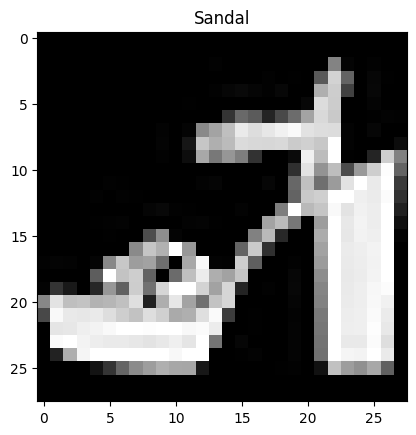

In [43]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [44]:
# Make predicitons
pred_probs = make_predictions(model=model_cnn,
                              data=test_samples)

# View first tow prediction probabilities
pred_probs[:2]

tensor([[6.5264e-06, 5.0083e-07, 6.0361e-06, 4.0862e-06, 1.8391e-08, 9.9983e-01,
         9.7119e-06, 7.6494e-06, 7.8685e-05, 5.9443e-05],
        [4.5748e-03, 2.8039e-04, 2.1988e-05, 9.9447e-01, 8.5848e-06, 1.5569e-05,
         1.1084e-04, 7.9249e-05, 4.1024e-04, 2.8693e-05]])

In [45]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
# Visualizing image targets
img, label = test_data[0][:10]
print(label)

tensor([5, 3, 3, 7, 8, 0, 3, 1, 7])
9


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [46]:
# from tqdm.auto import tqdm
from tqdm.auto import tqdm

import mlxtend
mlxtend.__version__

'0.23.1'

In [47]:
# 1. Make predictions with trained model
y_preds = []

model_cnn.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc= "Making predictions..."):

        # Send the data and target to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_cnn(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

        # Concatenate list of predictions into a tensor
        # print(y_preds)
        y_pred_tensor = torch.cat(y_preds)
        y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [48]:
len(y_pred_tensor)

10000

In [49]:
# See if required package are installed and if not, install them...

try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__verison__}")
    assert int(mlxtend.__verison__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    # print(f"mlxtend verions: {mlxtend.__verion__}")

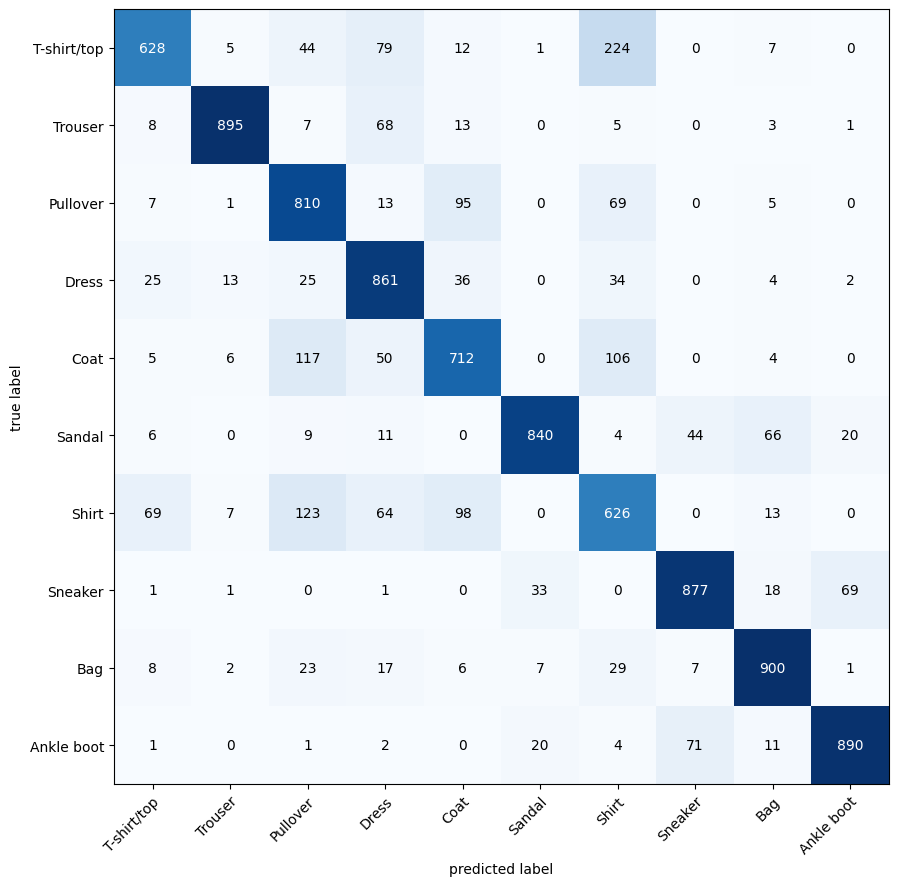

In [50]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 12)
)

In [51]:
confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

In [52]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save

MODEL_NAME = "03_pytorch_computer_vision_model_cnn.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_cnn.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_cnn.pth


In [53]:
image_shape = [1, 28, 28]

In [54]:
# Create a new new instance
torch.manual_seed(RANDOM_SEED)

loaded_model_cnn = FashionMNISTModel(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_cnn.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_cnn.to(device)

FashionMNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [55]:
RANDOM_SEED = 42

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[-0.0793,  1.6144, -0.4617,  ..., -0.3390,  0.1549, -0.2794],
         [-0.5967,  0.0242,  0.8264,  ...,  0.5394,  0.0590,  0.2875],
         [ 0.0881, -0.0106,  2.0317,  ...,  0.6341, -0.5408,  1.3265],
         ...,
         [ 0.5949,  1.0955,  0.7693,  ..., -0.5738,  0.9187,  0.7561],
         [ 0.4068,  0.9570,  0.2887,  ...,  0.1231,  0.7267,  0.3002],
         [ 1.9694,  0.9515,  1.3571,  ..., -0.7764, -0.4411, -0.2924]],

        [[-0.0115, -0.5974,  2.0710,  ..., -1.6814,  0.9977,  0.6090],
         [-1.2258,  1.6480, -1.4137,  ...,  0.7258,  0.8074, -0.7784],
         [ 1.4650, -0.3883, -0.5527,  ...,  0.5641,  0.2478, -0.1571],
         ...,
         [ 1.5853,  1.6764,  0.3468,  ...,  0.6637, -0.8358,  0.3972],
         [-1.4526,  0.4073,  0.3668,  ...,  0.8799,  0.6329, -0.3277],
         [ 0.6710, -2.3354, -0.2408,  ..., -0.3148, -0.6067, -1.9394]],

        [[-0

In [56]:
images.shape

torch.Size([32, 3, 64, 64])

In [57]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=2,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-0.7191,  0.2344, -0.5481,  ...,  0.2146, -0.3905,  0.3615],
          [-0.0531, -0.3116, -0.9761,  ..., -1.2184, -0.0208,  0.8871],
          [-0.3373, -0.6383,  0.6508,  ...,  0.5123, -0.0546,  0.6752],
          ...,
          [-0.8570,  0.4720,  0.3153,  ..., -1.0001,  0.6760,  0.6169],
          [ 0.9562, -0.1795, -0.0947,  ...,  0.2598, -0.3282,  0.3104],
          [ 0.1331,  0.6833, -0.4285,  ..., -0.0213, -0.7494,  1.1234]],

         [[ 0.5690, -0.2815, -0.3641,  ..., -0.7309,  1.1906,  0.1746],
          [ 0.4522,  0.3681, -0.4110,  ...,  1.4477, -0.0972, -0.7961],
          [-0.4219,  0.1971, -0.1734,  ...,  0.7853, -0.4598, -0.2381],
          ...,
          [ 0.4065,  0.4529, -1.2085,  ...,  0.4032, -0.7347,  0.5692],
          [-1.0220, -0.4287, -0.1189,  ..., -0.0103, -0.0021,  0.4036],
          [-1.0194, -1.3811, -0.0795,  ..., -0.4042, -0.1286,  0.1321]],

         [[-0.4686, -1.3918,  0.2611,  ..., -0.4106, -0.9268, -0.0033],
          [-0.2382,  0.4448,  

In [58]:
conv_output.shape

torch.Size([1, 10, 31, 31])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

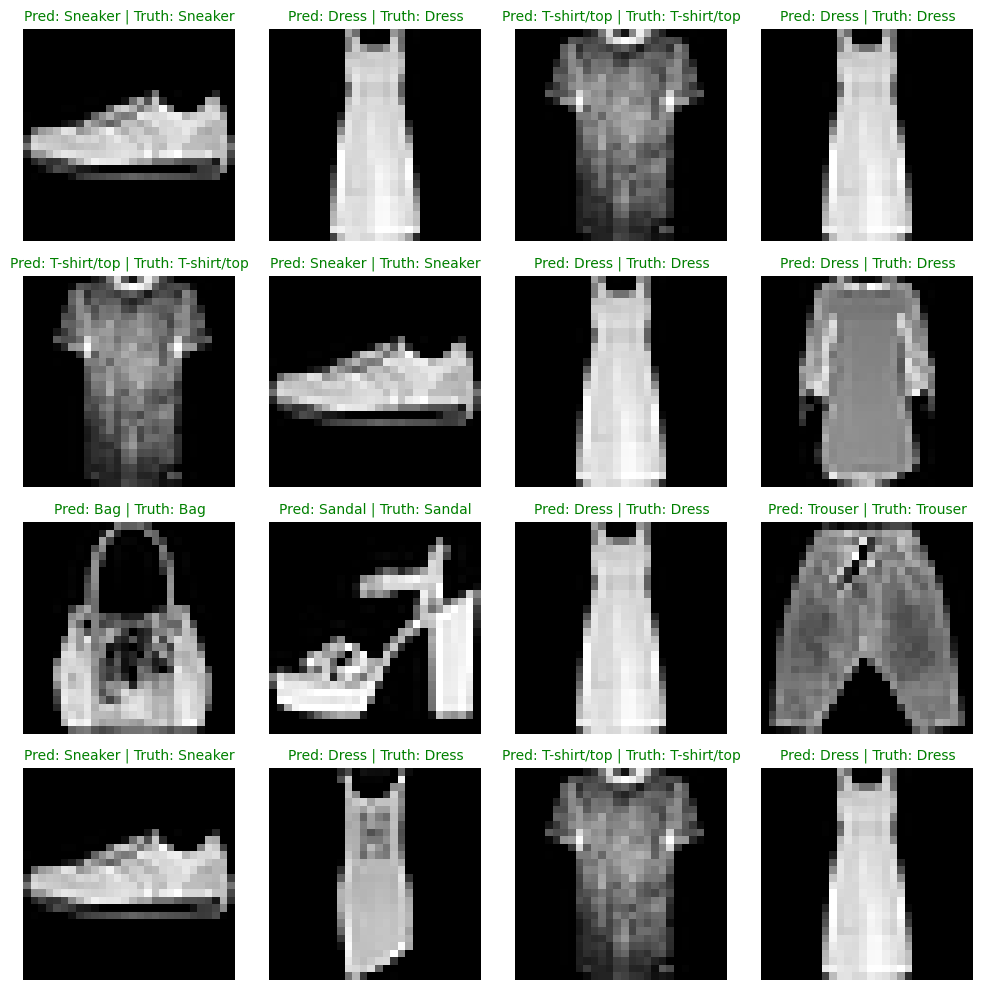

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Set the random seed for reproducibility (optional)
# torch.manual_seed(42)

plt.figure(figsize=(10, 10))
nrows = 4
ncols = 4
num_images = nrows * ncols

# Generate random indices
indices = torch.randint(high=len(test_samples), size=(num_images,))

for i in range(num_images):
    idx = indices[i]  # Get a random index

    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    # Ensure that sample is appropriately squeezed if it has an extra dimension
    plt.imshow(test_samples[idx].squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g., "Sandal")
    pred_label = class_names[pred_classes[idx]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[idx]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, color="green")  # green text if prediction is the same as truth
    else:
        plt.title(title_text, fontsize=10, color="red")

    plt.axis(False)

plt.tight_layout()
plt.show()

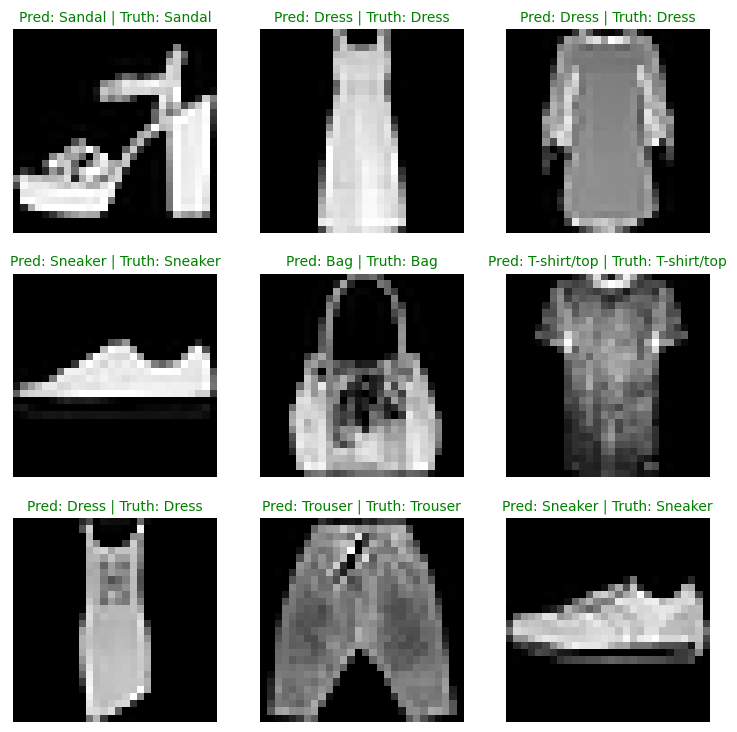

In [60]:
# Plot predictions

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):

    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and shange color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if prediction is same as truth
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)